In [3]:
#coding:utf8
import matplotlib
import os
if 'DISPLAY' not in os.environ:
    matplotlib.use('Agg')
else:
    pass
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy
from utils import Predicate,Clause,KnowledgeBase, Propositional
from utils import load_knowledge_base,load_propositional
from models import LTN
import pickle
import numpy as np
import seaborn as sns
sns.set(style="white", context="talk")
from utils import get_DF,show_learned_propositionals

In [4]:
emb_dim=30

# Terms

* variable
* function
* predicate
* clause

In [5]:
def show_results(model, knowledge_base):
    wrong=0
    for clause in knowledge_base.clauses:
        output=model.forward(clause=clause)
        if output[0].data.numpy()[0]<0.1:
            continue
        print(clause.show())
        print(output[0].data.numpy()[0], output[1].data.numpy()[0])
        wrong+=1
    print(wrong)

In [6]:
kb1=load_knowledge_base('./facts1.txt')
kb2=load_knowledge_base('./facts2.txt')
propositionals=load_propositional('./knowledge.txt')
gkbs1=[]
for p in propositionals:
    gkbs1.append(p.generate_knowledge_base('abcdefgh',change_weight=False))
gkb1=gkbs1[0]
for tkb in gkbs1[1:]:
    gkb1=gkb1.union(tkb)
gkbs2=[]
for p in propositionals:
    gkbs2.append(p.generate_knowledge_base('ijklmn',change_weight=False))
gkb2=gkbs2[0]
for tkb in gkbs2[1:]:
    gkb2=gkb2.union(tkb)

gkbs3=[]
for p in propositionals:
    gkbs3.append(p.generate_knowledge_base('abcdefgh',change_weight=True))
gkb3=gkbs3[0]
for tkb in gkbs3[1:]:
    gkb3=gkb3.union(tkb)
gkbs4=[]
for p in propositionals:
    gkbs4.append(p.generate_knowledge_base('ijklmn',change_weight=True))
gkb4=gkbs4[0]
for tkb in gkbs4[1:]:
    gkb4=gkb4.union(tkb)

  0%|          | 0/2000 [00:00<?, ?it/s]

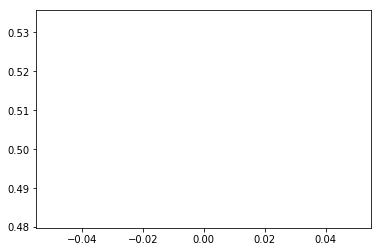

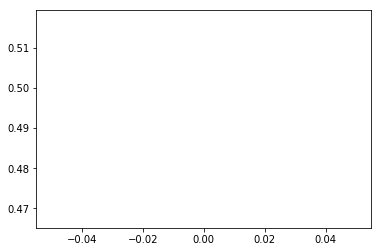

S(a)
[ 0.52074254] [ 0.47925749]
S(e)
[ 0.45371383] [ 0.54628617]
S(f)
[ 0.29024565] [ 0.70975435]
S(g)
[ 0.32669449] [ 0.67330551]
¬S(b)
[ 0.59278917] [ 0.40721083]
¬S(c)
[ 0.39564252] [ 0.60435748]
¬S(d)
[ 0.42731106] [ 0.57268894]
¬S(g)
[ 0.67330551] [ 0.32669449]
¬S(h)
[ 0.49770832] [ 0.50229168]
F(a, b)
[ 0.64378875] [ 0.35621125]
F(a, e)
[ 0.5163157] [ 0.48368433]
F(a, f)
[ 0.30382574] [ 0.69617426]
F(a, g)
[ 0.33311474] [ 0.66688526]
F(b, c)
[ 0.53307378] [ 0.46692622]
F(c, d)
[ 0.52255082] [ 0.47744915]
F(e, f)
[ 0.31328017] [ 0.68671983]
F(g, h)
[ 0.56296575] [ 0.43703428]
¬F(a, c)
[ 0.50580752] [ 0.49419248]
¬F(a, d)
[ 0.46592546] [ 0.53407454]
¬F(a, h)
[ 0.46030641] [ 0.53969359]
¬F(b, d)
[ 0.44076109] [ 0.55923891]
¬F(b, e)
[ 0.22165942] [ 0.77834058]
¬F(b, f)
[ 0.24241602] [ 0.75758398]
¬F(b, g)
[ 0.30762708] [ 0.69237292]
¬F(b, h)
[ 0.24716884] [ 0.75283116]
¬F(c, e)
[ 0.39018887] [ 0.60981113]
¬F(c, f)
[ 0.40767211] [ 0.59232789]
¬F(c, g)
[ 0.31399763] [ 0.68600237]
¬F(c

  0%|          | 1/2000 [00:01<56:57,  1.71s/it]


[ 0.47694433] [ 0.52305567]
C(e)
[ 0.31463104] [ 0.68536896]
¬C(b)
[ 0.35794222] [ 0.64205778]
¬C(c)
[ 0.58622527] [ 0.41377473]
¬C(d)
[ 0.17006052] [ 0.82993948]
¬C(f)
[ 0.43690741] [ 0.56309259]
¬C(g)
[ 0.19716859] [ 0.80283141]
¬C(h)
[ 0.44917727] [ 0.55082273]
S(i)
[ 0.5230841] [ 0.4769159]
S(n)
[ 0.34972245] [ 0.65027755]
¬S(j)
[ 0.26043153] [ 0.73956847]
¬S(k)
[ 0.36447251] [ 0.63552749]
¬S(l)
[ 0.48147619] [ 0.51852381]
¬S(m)
[ 0.345456] [ 0.654544]
F(i, j)
[ 0.69963455] [ 0.30036542]
F(i, m)
[ 0.46883315] [ 0.53116685]
F(k, l)
[ 0.42745894] [ 0.57254106]
F(m, n)
[ 0.41255796] [ 0.58744204]
¬F(i, k)
[ 0.27673805] [ 0.72326195]
¬F(i, l)
[ 0.69915283] [ 0.30084717]
¬F(i, n)
[ 0.59718156] [ 0.40281844]
¬F(j, k)
[ 0.43897432] [ 0.56102568]
¬F(j, l)
[ 0.30431944] [ 0.69568056]
¬F(j, m)
[ 0.28837645] [ 0.71162355]
¬F(j, n)
[ 0.33642507] [ 0.66357493]
¬F(l, n)
[ 0.46292984] [ 0.53707016]
¬F(k, m)
[ 0.39373678] [ 0.60626322]
¬F(l, m)
[ 0.50352591] [ 0.49647409]
65


  5%|▌         | 100/2000 [01:29<28:27,  1.11it/s]

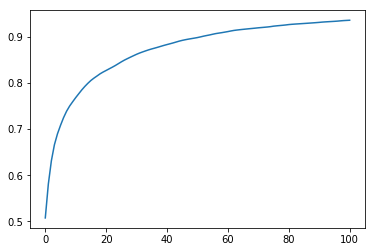

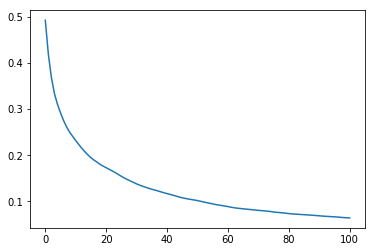

  5%|▌         | 101/2000 [01:31<28:36,  1.11it/s]

S(g)
[ 0.340168] [ 0.659832]
¬S(g)
[ 0.659832] [ 0.340168]
F(a, e)
[ 0.11869514] [ 0.88130486]
F(b, c)
[ 0.16297013] [ 0.83702987]
F(c, d)
[ 0.33958429] [ 0.66041571]
F(g, h)
[ 0.35668617] [ 0.64331383]
¬F(a, d)
[ 0.19612646] [ 0.80387354]
F(i, j)
[ 0.24730664] [ 0.75269336]
F(m, n)
[ 0.1133917] [ 0.8866083]
9


 10%|█         | 200/2000 [02:48<25:12,  1.19it/s]

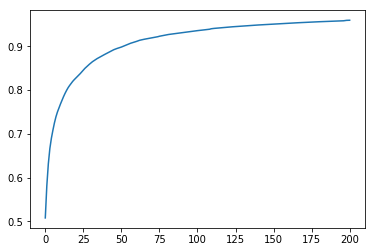

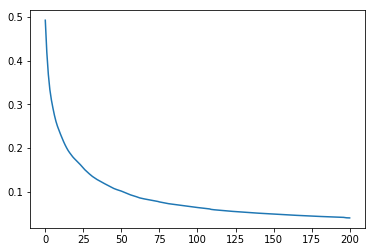

 10%|█         | 201/2000 [02:49<25:13,  1.19it/s]

S(g)
[ 0.30343813] [ 0.69656187]
¬S(g)
[ 0.69656187] [ 0.30343813]
F(b, c)
[ 0.10612464] [ 0.89387536]
F(c, d)
[ 0.18995041] [ 0.81004959]
F(g, h)
[ 0.19293141] [ 0.80706859]
¬F(a, d)
[ 0.17222869] [ 0.82777131]
F(i, j)
[ 0.16181344] [ 0.83818656]
7


 15%|█▌        | 300/2000 [04:04<23:06,  1.23it/s]

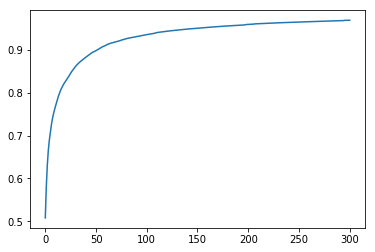

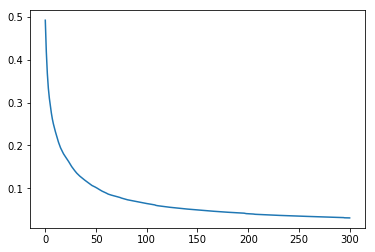

 15%|█▌        | 301/2000 [04:05<23:07,  1.22it/s]

S(g)
[ 0.27820343] [ 0.72179657]
¬S(g)
[ 0.72179657] [ 0.27820343]
F(c, d)
[ 0.13729167] [ 0.86270833]
¬F(a, d)
[ 0.14674854] [ 0.85325146]
F(i, j)
[ 0.11413932] [ 0.88586068]
5


 20%|██        | 400/2000 [05:09<20:38,  1.29it/s]

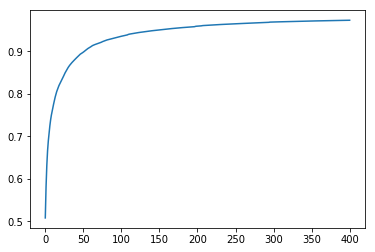

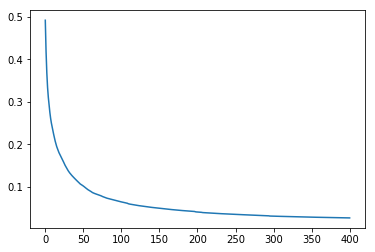

 20%|██        | 401/2000 [05:10<20:39,  1.29it/s]

S(g)
[ 0.26544893] [ 0.73455107]
¬S(g)
[ 0.73455107] [ 0.26544893]
F(c, d)
[ 0.10433829] [ 0.89566171]
¬F(a, d)
[ 0.12076676] [ 0.87923324]
4


 25%|██▌       | 500/2000 [06:13<18:39,  1.34it/s]

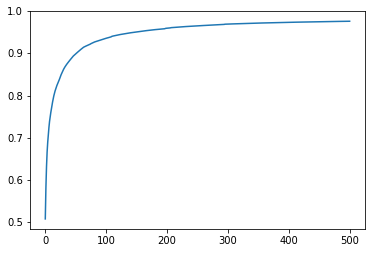

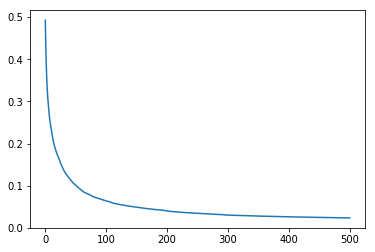

 25%|██▌       | 501/2000 [06:14<18:39,  1.34it/s]

S(g)
[ 0.2560811] [ 0.7439189]
¬S(g)
[ 0.7439189] [ 0.2560811]
¬F(a, d)
[ 0.10001671] [ 0.89998329]
3


 30%|███       | 600/2000 [07:32<17:35,  1.33it/s]

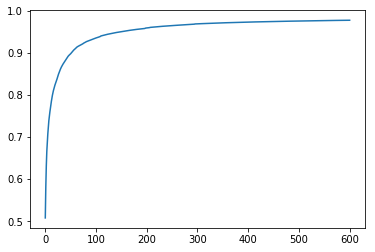

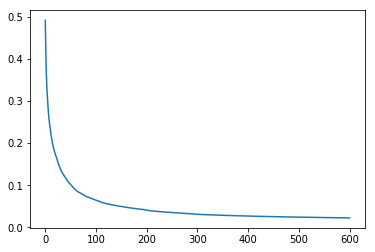

 30%|███       | 601/2000 [07:33<17:36,  1.32it/s]

S(g)
[ 0.24937803] [ 0.75062197]
¬S(g)
[ 0.75062197] [ 0.24937803]
2


 35%|███▌      | 700/2000 [08:49<16:22,  1.32it/s]

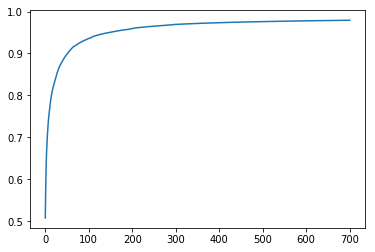

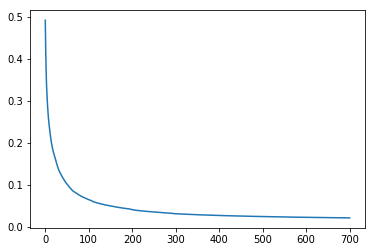

 35%|███▌      | 701/2000 [08:50<16:23,  1.32it/s]

S(g)
[ 0.24629813] [ 0.75370187]
¬S(g)
[ 0.75370187] [ 0.24629813]
2


 40%|████      | 800/2000 [10:08<15:13,  1.31it/s]

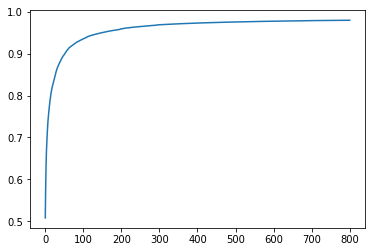

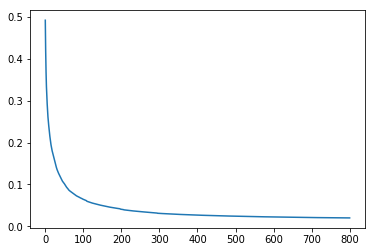

 40%|████      | 801/2000 [10:10<15:13,  1.31it/s]

S(g)
[ 0.24746436] [ 0.75253564]
¬S(g)
[ 0.75253564] [ 0.24746436]
2


 45%|████▌     | 900/2000 [11:27<14:00,  1.31it/s]

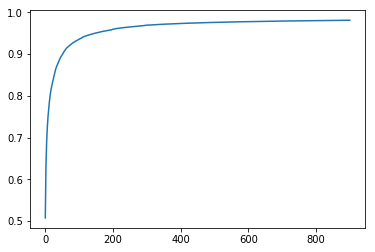

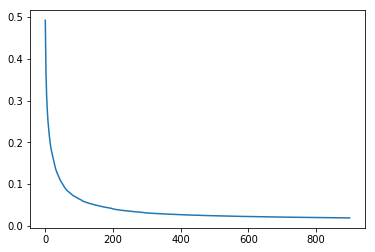

 45%|████▌     | 901/2000 [11:28<13:59,  1.31it/s]

S(g)
[ 0.25164735] [ 0.74835265]
¬S(g)
[ 0.74835265] [ 0.25164735]
2


 50%|█████     | 1000/2000 [12:44<12:44,  1.31it/s]

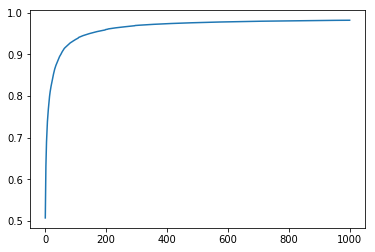

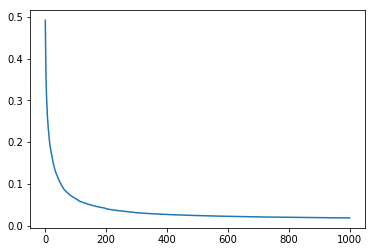

 50%|█████     | 1001/2000 [12:45<12:44,  1.31it/s]

S(g)
[ 0.24753726] [ 0.75246274]
¬S(g)
[ 0.75246274] [ 0.24753726]
2


 55%|█████▌    | 1100/2000 [13:59<11:26,  1.31it/s]

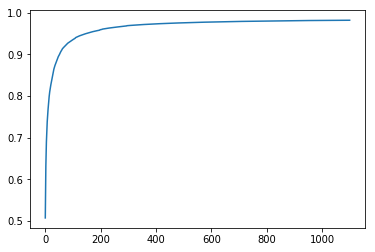

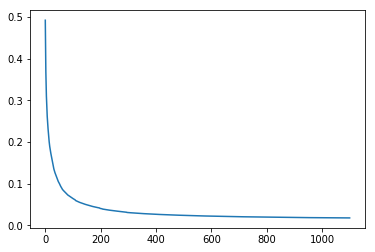

 55%|█████▌    | 1101/2000 [14:00<11:26,  1.31it/s]

S(g)
[ 0.242621] [ 0.757379]
¬S(g)
[ 0.757379] [ 0.242621]
2


 60%|██████    | 1200/2000 [15:13<10:08,  1.31it/s]

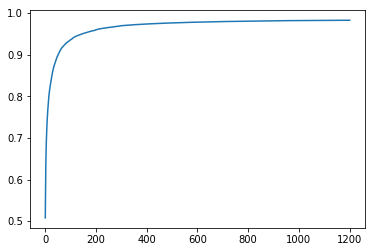

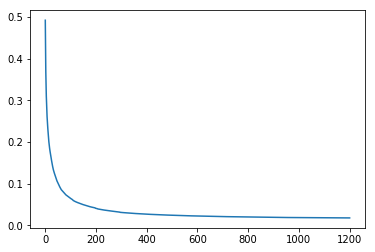

 60%|██████    | 1201/2000 [15:14<10:08,  1.31it/s]

S(g)
[ 0.23792344] [ 0.76207656]
¬S(g)
[ 0.76207656] [ 0.23792344]
2


 65%|██████▌   | 1300/2000 [16:27<08:51,  1.32it/s]

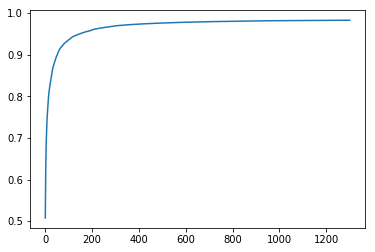

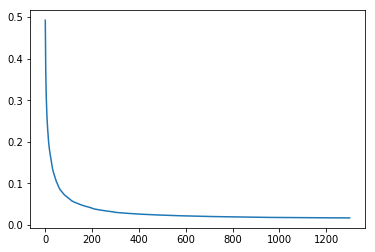

 65%|██████▌   | 1301/2000 [16:28<08:50,  1.32it/s]

S(g)
[ 0.23350042] [ 0.76649958]
¬S(g)
[ 0.76649958] [ 0.23350042]
2


 70%|███████   | 1400/2000 [17:38<07:33,  1.32it/s]

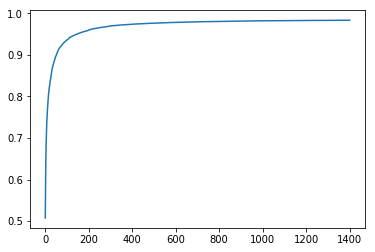

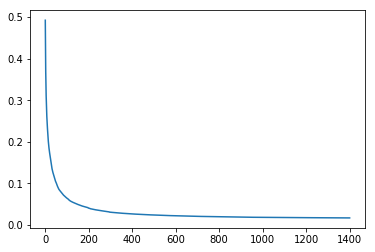

 70%|███████   | 1401/2000 [17:39<07:33,  1.32it/s]

S(g)
[ 0.22964036] [ 0.77035964]
¬S(g)
[ 0.77035964] [ 0.22964036]
2


 72%|███████▏  | 1444/2000 [18:12<07:00,  1.32it/s]

KeyboardInterrupt: 

In [5]:
ltn1=LTN(emb_dim,'abcdefghijklmn',[['S',1],['F',2],['C',1]],CLTN=False)
kb_train=kb1.union(kb2)
optimizor=torch.optim.Adam(ltn1.parameters(),lr=0.001)
mone=torch.FloatTensor([-1])
one=torch.FloatTensor([1])
average_prob=[]
averate_loss=[]
for i in tqdm(range(2000)):
    optimizor.zero_grad()
    total_probability=0.0
    total_loss=0.0
    for clause in kb_train.clauses:
        loss,prob=ltn1.forward(clause=clause)
        loss.backward(one)
        total_probability+=prob.data.numpy()[0]
        total_loss+=loss.data.numpy()[0]
    optimizor.step()
    average_prob.append(total_probability/len(kb_train.clauses))
    averate_loss.append(total_loss/len(kb_train.clauses))
    
    if i%100==0:
        plt.plot(average_prob)
        plt.show()
        plt.plot(averate_loss)
        plt.show()
        show_results(ltn1, kb_train)

In [7]:
get_DF(ltn1,'abcdefgh')

NameError: name 'ltn1' is not defined

In [51]:
get_DF(ltn1,'ijklmn')

,S,C,i,j,k,l,m,n
i,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00
j,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
k,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
l,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
m,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
n,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
show_learned_propositionals(ltn1,propositionals)

In [67]:
a.t().mm(a).size()

torch.Size([10, 10])


  0%|          | 0/2000 [00:00<?, ?it/s]

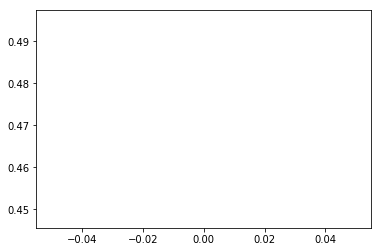

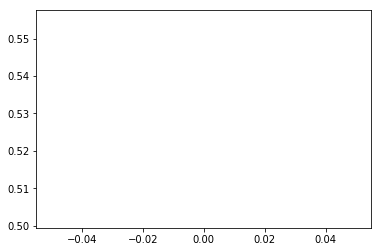

S(a)
[ 0.63019526] [ 0.36980471]
S(e)
[ 0.49797171] [ 0.50202829]
S(f)
[ 0.51420188] [ 0.48579815]
S(g)
[ 0.72456509] [ 0.27543491]
¬S(b)
[ 0.32702273] [ 0.67297727]
¬S(c)
[ 0.549568] [ 0.450432]
¬S(d)
[ 0.3687166] [ 0.6312834]
¬S(g)
[ 0.27543491] [ 0.72456509]
¬S(h)
[ 0.44395769] [ 0.55604231]
F(a, b)
[ 0.45601499] [ 0.54398501]
F(a, e)
[ 0.48853332] [ 0.51146668]
F(a, f)
[ 0.47687995] [ 0.52312005]
F(a, g)
[ 0.46138108] [ 0.53861892]
F(b, c)
[ 0.47290176] [ 0.52709824]
F(c, d)
[ 0.46657163] [ 0.53342837]
F(e, f)
[ 0.4293642] [ 0.5706358]
F(g, h)
[ 0.55163896] [ 0.44836104]
¬F(a, c)
[ 0.46397591] [ 0.53602409]
¬F(a, d)
[ 0.53037894] [ 0.46962106]
¬F(a, h)
[ 0.43125808] [ 0.56874192]
¬F(b, d)
[ 0.49478531] [ 0.50521469]
¬F(b, e)
[ 0.45903343] [ 0.54096657]
¬F(b, f)
[ 0.44822478] [ 0.55177522]
¬F(b, g)
[ 0.48211676] [ 0.51788324]
¬F(b, h)
[ 0.38510317] [ 0.61489683]
¬F(c, e)
[ 0.46220356] [ 0.53779644]
¬F(c, f)
[ 0.53942794] [ 0.46057206]
¬F(c, g)
[ 0.43831468] [ 0.56168532]
¬F(c, h)
[ 


  0%|          | 2/2000 [00:01<33:07,  1.01it/s]  

67



  1%|          | 24/2000 [00:06<08:51,  3.72it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/sunxiaofei/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  5%|▌         | 100/2000 [00:16<05:21,  5.90it/s]

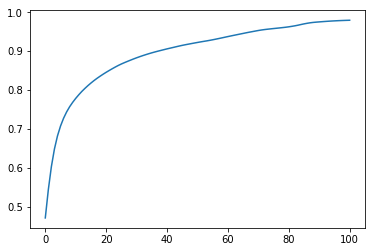

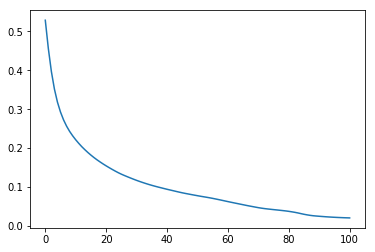

S(g)
[ 0.92263812] [ 0.07736187]
¬F(a, a)
[ 0.1226409] [ 0.0188728]


  5%|▌         | 101/2000 [00:18<05:40,  5.57it/s]

¬S(f) ∨ C(f)
[ 0.12456546] [ 0.00347632]
¬S(i) ∨ C(i)
[ 0.10041319] [ 0.39752087]
¬S(n) ∨ C(n)
[ 0.14302574] [ 0.14184555]
5


 10%|█         | 200/2000 [00:33<04:58,  6.04it/s]

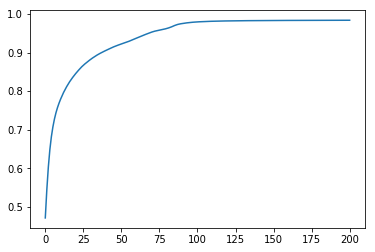

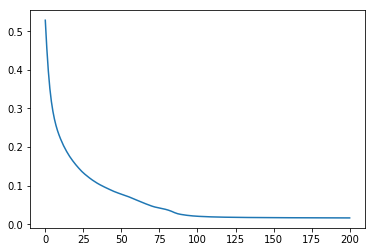

S(g)
[ 0.93438339] [ 0.06561662]
¬F(a, a)
[ 0.12437233] [ 0.00502139]
¬S(f) ∨ C(f)
[ 0.12483782] [ 0.00129747]


 10%|█         | 201/2000 [00:35<05:13,  5.73it/s]

¬S(i) ∨ C(i)
[ 0.10393095] [ 0.37641433]
¬S(n) ∨ C(n)
[ 0.14674294] [ 0.11954243]
5


 15%|█▌        | 300/2000 [00:50<04:43,  6.00it/s]

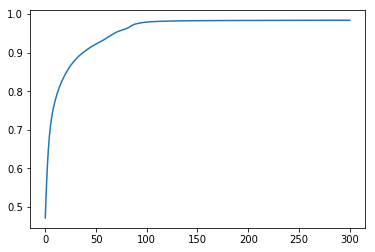

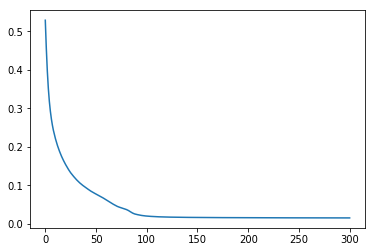

S(g)
[ 0.93895316] [ 0.06104684]
¬F(a, a)
[ 0.12460695] [ 0.00314438]


 15%|█▌        | 301/2000 [00:50<04:47,  5.91it/s]

¬S(f) ∨ C(f)
[ 0.12491363] [ 0.00069094]
¬S(i) ∨ C(i)
[ 0.10563334] [ 0.3662]
¬S(n) ∨ C(n)
[ 0.1492531] [ 0.10448141]
5


 20%|██        | 400/2000 [01:04<04:16,  6.24it/s]

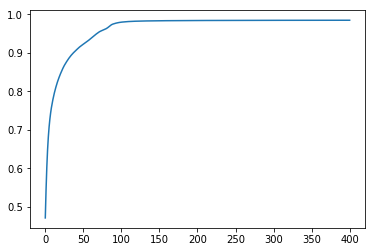

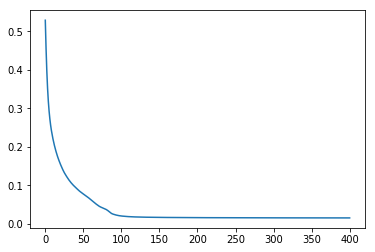

S(g)
[ 0.9422394] [ 0.05776062]
¬F(a, a)
[ 0.12471691] [ 0.00226474]
¬S(f) ∨ C(f)
[ 0.12494559] [ 0.00043529]


 20%|██        | 402/2000 [01:05<04:20,  6.13it/s]

¬S(i) ∨ C(i)
[ 0.10745035] [ 0.35529792]
¬S(n) ∨ C(n)
[ 0.15073332] [ 0.09560012]
5


 25%|██▌       | 500/2000 [01:18<03:56,  6.34it/s]

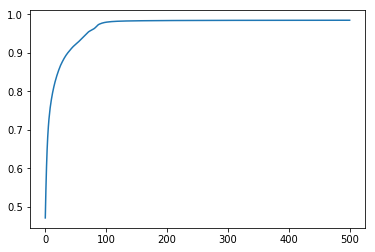

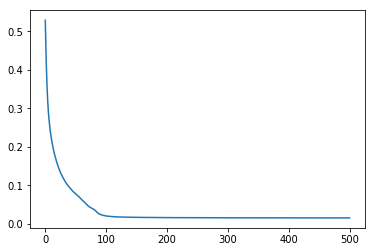

S(g)
[ 0.94469237] [ 0.05530762]
¬F(a, a)
[ 0.12478647] [ 0.00170821]
¬S(f) ∨ C(f)
[ 0.12496233] [ 0.00030136]


 25%|██▌       | 501/2000 [01:19<03:58,  6.27it/s]

¬S(i) ∨ C(i)
[ 0.10910021] [ 0.34539875]
¬S(n) ∨ C(n)
[ 0.15192339] [ 0.0884597]
5


 30%|███       | 600/2000 [01:33<03:37,  6.45it/s]

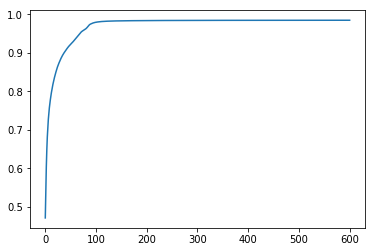

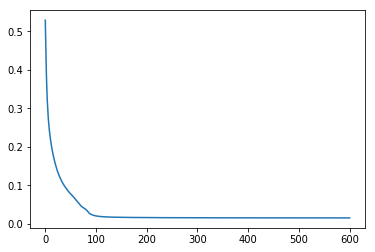

S(g)
[ 0.94620651] [ 0.05379349]
¬F(a, a)
[ 0.12483073] [ 0.00135416]
¬S(f) ∨ C(f)
[ 0.12497229] [ 0.00022167]
¬S(i) ∨ C(i)
[ 0.11039595]

 30%|███       | 602/2000 [01:34<03:38,  6.39it/s]

 [ 0.33762434]
¬S(n) ∨ C(n)
[ 0.15297005] [ 0.08217979]
5


 35%|███▌      | 700/2000 [01:52<03:29,  6.21it/s]

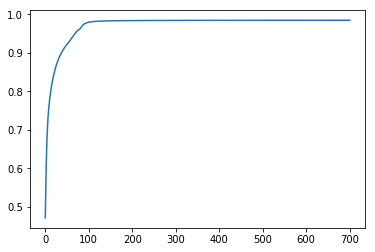

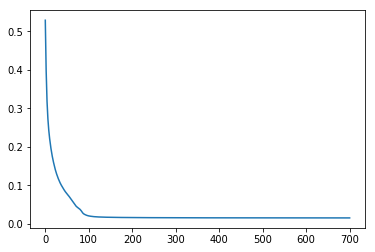

S(g)
[ 0.9471904] [ 0.05280962]
¬F(a, a)
[ 0.12485989] [ 0.00112087]


 35%|███▌      | 701/2000 [01:53<03:30,  6.16it/s]

¬S(f) ∨ C(f)
[ 0.12497874] [ 0.00017011]
¬S(i) ∨ C(i)
[ 0.11128708] [ 0.33227754]
¬S(n) ∨ C(n)
[ 0.1539031] [ 0.07658148]
5


 40%|████      | 800/2000 [02:08<03:12,  6.23it/s]

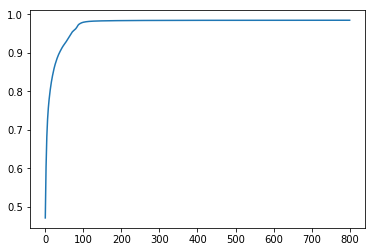

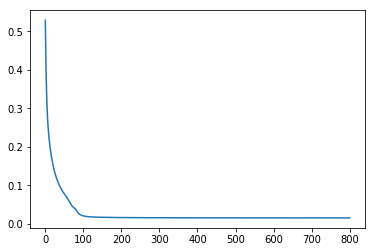

S(g)
[ 0.94767505] [ 0.05232498]
¬F(a, a)
[ 0.12488212] [ 0.00094301]


 40%|████      | 801/2000 [02:09<03:13,  6.19it/s]

¬S(f) ∨ C(f)
[ 0.12498376] [ 0.00012994]
¬S(i) ∨ C(i)
[ 0.11190643] [ 0.3285614]
¬S(n) ∨ C(n)
[ 0.15465887] [ 0.07204679]
5


 45%|████▌     | 900/2000 [02:25<02:57,  6.20it/s]

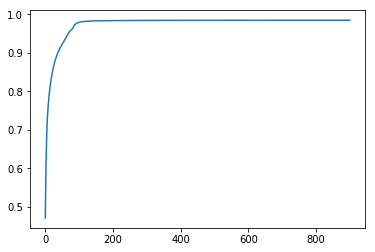

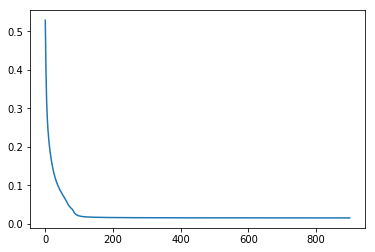

S(g)
[ 0.94723946] [ 0.05276052]
¬F(a, a)
[ 0.12489999] [ 0.00080007]
¬S(f) ∨ C(f)
[ 0.12498794] [  9.64403152e-05]
¬S(i) ∨ C(i)
[ 0.11238867] [ 0.32566795]


 45%|████▌     | 902/2000 [02:26<02:58,  6.17it/s]

¬S(n) ∨ C(n)
[ 0.15527418] [ 0.06835498]
5


 50%|█████     | 1000/2000 [02:41<02:41,  6.21it/s]

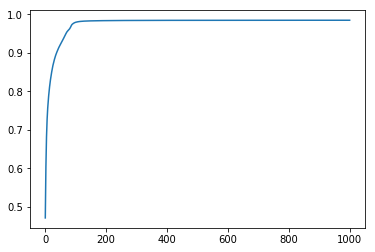

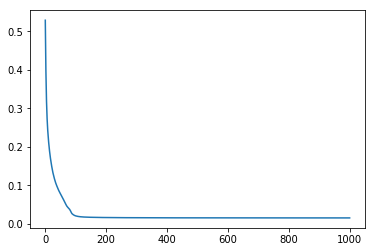

S(g)
[ 0.94728035] [ 0.05271966]
¬F(a, a)
[ 0.12491404] [ 0.00068772]


 50%|█████     | 1001/2000 [02:42<02:42,  6.16it/s]

¬S(f) ∨ C(f)
[ 0.12499052] [  7.58171082e-05]
¬S(i) ∨ C(i)
[ 0.11279833] [ 0.32321006]
¬S(n) ∨ C(n)
[ 0.15578865] [ 0.06526817]
5


 55%|█████▌    | 1100/2000 [02:55<02:23,  6.28it/s]

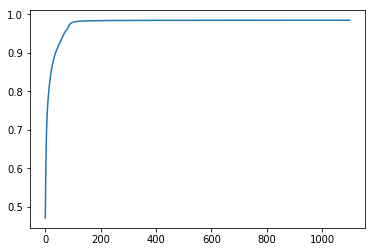

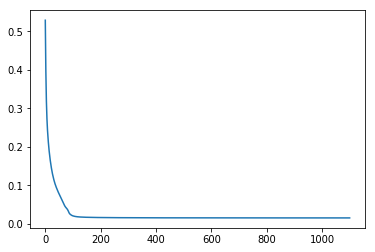

S(g)
[ 0.94758791] [ 0.05241209]
¬F(a, a)
[ 0.12492515] [ 0.00059879]


 55%|█████▌    | 1101/2000 [02:56<02:24,  6.24it/s]

¬S(f) ∨ C(f)
[ 0.12499231] [  6.15119934e-05]
¬S(i) ∨ C(i)
[ 0.11314764] [ 0.32111421]
¬S(n) ∨ C(n)
[ 0.1562635] [ 0.06241907]
5


 60%|██████    | 1200/2000 [03:10<02:06,  6.31it/s]

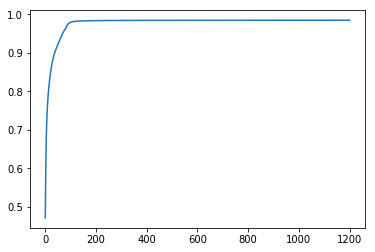

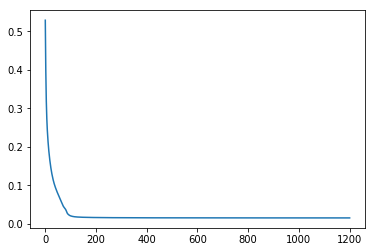

S(g)
[ 0.94796449] [ 0.05203548]
¬F(a, a)
[ 0.12493359] [ 0.00053126]


 60%|██████    | 1201/2000 [03:11<02:07,  6.28it/s]

¬S(f) ∨ C(f)
[ 0.12499362] [  5.10215759e-05]
¬S(i) ∨ C(i)
[ 0.11347716] [ 0.31913707]
¬S(n) ∨ C(n)
[ 0.15669888] [ 0.05980675]
5


 65%|██████▌   | 1300/2000 [03:23<01:49,  6.38it/s]

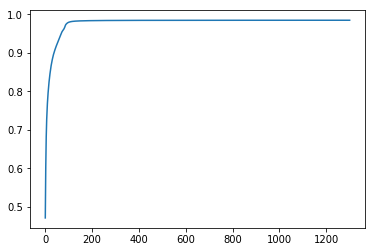

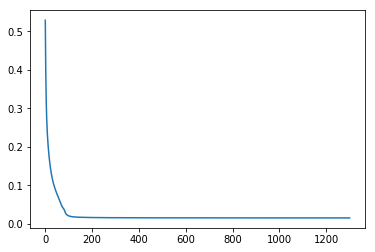

S(g)
[ 0.94840533] [ 0.05159467]
¬F(a, a)
[ 0.12494108] [ 0.00047135]


 65%|██████▌   | 1301/2000 [03:24<01:50,  6.35it/s]

¬S(f) ∨ C(f)
[ 0.12499462] [  4.30345535e-05]
¬S(i) ∨ C(i)
[ 0.11379074] [ 0.31725562]
¬S(n) ∨ C(n)
[ 0.15708518] [ 0.05748896]
5


 70%|███████   | 1400/2000 [03:38<01:33,  6.40it/s]

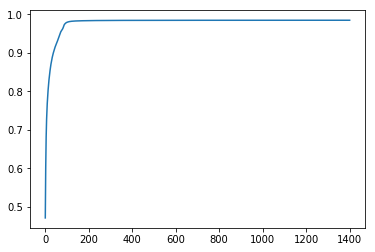

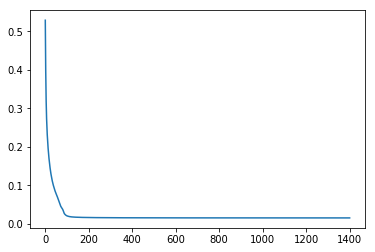

S(g)
[ 0.94881707] [ 0.05118293]
¬F(a, a)
[ 0.12494787] [ 0.00041705]
¬S(f) ∨ C(f)
[ 0.12499541] [  3.67164612e-05]


 70%|███████   | 1401/2000 [03:40<01:34,  6.37it/s]

¬S(i) ∨ C(i)
[ 0.1140778] [ 0.31553322]
¬S(n) ∨ C(n)
[ 0.15743414] [ 0.05539519]
5


 75%|███████▌  | 1500/2000 [03:55<01:18,  6.37it/s]

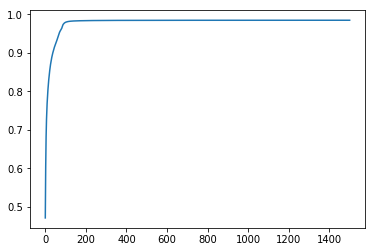

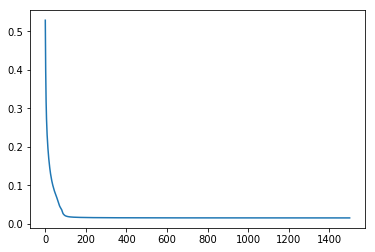

S(g)
[ 0.94917881] [ 0.05082119]
¬F(a, a)
[ 0.12495354] [ 0.00037169]
¬S(f) ∨ C(f)
[ 0.12499604] [  3.17096710e-05]


 75%|███████▌  | 1502/2000 [03:56<01:18,  6.35it/s]

¬S(i) ∨ C(i)
[ 0.11435813] [ 0.31385127]
¬S(n) ∨ C(n)
[ 0.15774229] [ 0.05354631]
5


 80%|████████  | 1600/2000 [04:10<01:02,  6.39it/s]

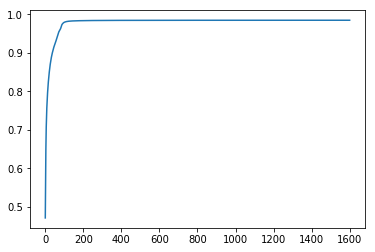

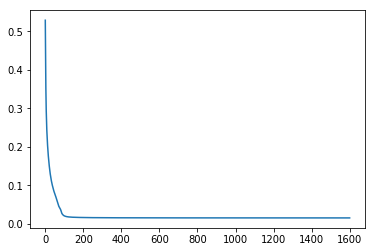

S(g)
[ 0.94938767] [ 0.05061235]
¬F(a, a)
[ 0.12495808] [ 0.00033534]
¬S(f) ∨ C(f)
[ 0.12499656] [  2.75373459e-05]


 80%|████████  | 1602/2000 [04:11<01:02,  6.36it/s]

¬S(i) ∨ C(i)
[ 0.11458977] [ 0.31246135]
¬S(n) ∨ C(n)
[ 0.15801978] [ 0.05188136]
5


 85%|████████▌ | 1700/2000 [04:27<00:47,  6.36it/s]

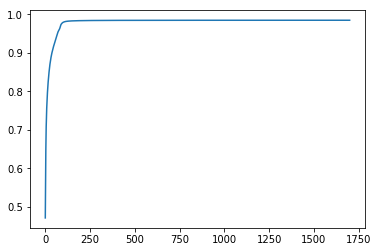

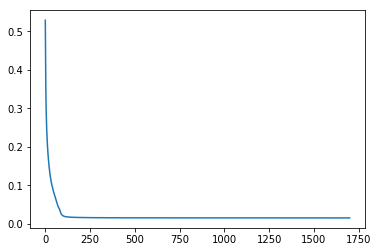

S(g)
[ 0.94966817] [ 0.05033183]
¬F(a, a)
[ 0.12496214] [ 0.00030291]


 85%|████████▌ | 1701/2000 [04:28<00:47,  6.34it/s]

¬S(f) ∨ C(f)
[ 0.12499698] [  2.41994858e-05]
¬S(i) ∨ C(i)
[ 0.11481594] [ 0.31110442]
¬S(n) ∨ C(n)
[ 0.158281] [ 0.0503141]
5


 90%|█████████ | 1800/2000 [04:46<00:31,  6.29it/s]

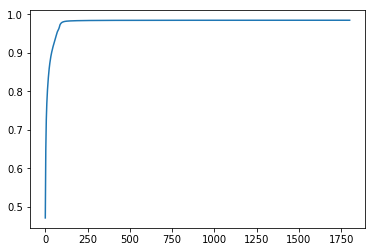

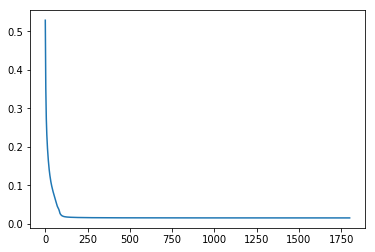

S(g)
[ 0.95009637] [ 0.04990365]
¬F(a, a)
[ 0.12496554] [ 0.00027567]


 90%|█████████ | 1801/2000 [04:46<00:31,  6.28it/s]

¬S(f) ∨ C(f)
[ 0.12499733] [  2.13384628e-05]
¬S(i) ∨ C(i)
[ 0.11503528] [ 0.30978838]
¬S(n) ∨ C(n)
[ 0.15852159] [ 0.04887042]
5


 95%|█████████▌| 1900/2000 [04:59<00:15,  6.34it/s]

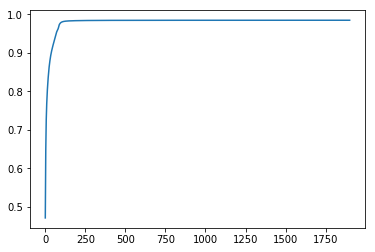

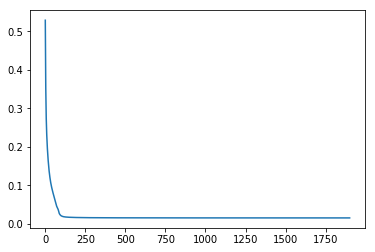

S(g)
[ 0.95049471] [ 0.04950531]
¬F(a, a)
[ 0.12496833] [ 0.00025338]
¬S(f) ∨ C(f)
[ 0.12499763] [  1.89542770e-05]
¬S(i) ∨ C(i)
[ 0.11524817] [ 0.30851102]


 95%|█████████▌| 1902/2000 [05:00<00:15,  6.32it/s]

¬S(n) ∨ C(n)
[ 0.15874] [ 0.04756004]
5


100%|██████████| 2000/2000 [05:14<00:00,  6.36it/s]


In [15]:
kb_train2=kb1.union(kb2).union(gkb3).union(gkb4)
ltn2=LTN(emb_dim,'abcdefghijklmn',[['S',1],['F',2],['C',1]],CLTN=True)
optimizor=torch.optim.Adam(ltn2.parameters(),lr=0.001)
mone=torch.FloatTensor([-1])
one=torch.FloatTensor([1])
average_prob2=[]
average_loss2=[]
for i in tqdm(range(2000)):
    optimizor.zero_grad()
    total_probability=0.0
    total_loss=0.0
    for clause in kb_train.clauses:
        loss,prob=ltn2.forward(clause=clause)
        loss.backward(one)
        total_probability+=prob.data.numpy()[0]
        total_loss+=loss.data.numpy()[0]
    optimizor.step()
    average_prob2.append(total_probability/len(kb_train.clauses))
    average_loss2.append(total_loss/len(kb_train.clauses))
    if i%100==0:
        plt.plot(average_prob2)
        plt.show()
        plt.plot(average_loss2)
        plt.show()
        show_results(ltn2,kb_train2)

In [55]:
get_DF(ltn1,'abcdefgh')

/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/torch/autograd/_functions/basic_ops.py:48: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return a.mul(b)


,S,C,a,b,c,d,e,f,g,h
a,0.99,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
b,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
c,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
d,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
e,0.99,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
f,0.98,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
g,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
h,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
ltn1.Constants.forward('a')

Variable containing:
 0.0837  0.0006 -0.2070 -0.0008  0.2650  0.0007 -0.2235 -0.0005  0.1580  0.0002
[torch.FloatTensor of size 1x10]

In [58]:
ltn1.Predicates['F'].conv[0].weight

Parameter containing:
(0 ,0 ,.,.) = 
1.00000e-03 *
  -0.0105  5.8030  0.0131 -2.4624
  -0.0093  5.1303  0.0111 -2.1133
   0.0011 -0.5820 -0.0015  0.2873

(1 ,0 ,.,.) = 
1.00000e-03 *
  -0.0110  5.9128  0.0135 -2.5726
  -0.0096  5.3519  0.0115 -2.2103
   0.0011 -0.6167 -0.0015  0.3197
[torch.FloatTensor of size 2x1x3x4]

In [51]:
get_DF(ltn1,'ijklmn')

,S,C,i,j,k,l,m,n
i,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00
j,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
k,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
l,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
m,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
n,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [112]:
get_DF(ltn2,'abcdefgh')

,S,C,a,b,c,d,e,f,g,h
a,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
b,0.00,0.00,1.00,0.05,1.00,0.00,0.00,0.00,0.00,0.00
c,0.00,0.00,0.00,1.00,0.93,1.00,0.00,0.00,0.00,0.00
d,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
e,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
f,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.01,0.00,0.00
g,0.49,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,1.00
h,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [16]:
get_DF(ltn2,'ijklmn')

NameError: name 'get_DF' is not defined

In [101]:
def get_accuracy(model,kb):
    results=[]
    for clause in kb.clauses:
        o1,o2=model.forward(clause)
        if o2.data.numpy()[0][0]>0.9:
            results.append(1.0)
        else:
            results.append(0.0)

    return sum(results)/len(kb.clauses)

In [102]:
def show_learned_propositionals(model,propositionals):
    results=pd.DataFrame(index=range(len(propositionals)),columns=['Propositional','Group1','Group2'])
    for i,propositional in enumerate(propositionals):
        total=0
        true_count=0
        kkk1=propositional.generate_knowledge_base('abcdefgh')
        kkk2=propositional.generate_knowledge_base('ijklmn')
        a1=get_accuracy(model,kkk1)
        a2=get_accuracy(model,kkk2)
        results.iloc[i]=dict(Propositional=propositional.clause.show(),Group1=a1,Group2=a2)
    return results

In [114]:
show_learned_propositionals(ltn1,propositionals)

,Propositional,Group1,Group2
0,"¬F(x, x)",0.875,0.666667
1,"¬F(x, y) ∨ F(y, x)",1,0.972222
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.96875,0.916667
4,¬S(x) ∨ C(x),0.875,0.666667


In [115]:
show_learned_propositionals(ltn2,propositionals)

,Propositional,Group1,Group2
0,"¬F(x, x)",0.625,0.5
1,"¬F(x, y) ∨ F(y, x)",0.984375,0.916667
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.9375,0.916667
4,¬S(x) ∨ C(x),0.75,0.666667


In [265]:
class Test(nn.Module):
    def __init__(self):
        super(Test, self).__init__()
        self.W=nn.Parameter(torch.randn(10, 10, 10))
    def forward(self, embs, negation):
        pass

In [295]:
a=nn.Bilinear(20,20,10,bias=False)

In [298]:
input1=Variable(torch.randn(1, 20))
input2=Variable(torch.randn(1, 20))
a(input1,input2)

Variable containing:
-2.8624  0.1028 -0.7835  2.1155 -0.1974  2.5639  4.0751  0.9362 -6.3984  0.9882
[torch.FloatTensor of size 1x10]

In [10]:
prob,loss,first,second,best_table1,best_table2,best_table3=pickle.load(open('./results/result2.pkl','rb'),encoding='latin1')

In [13]:
best_table3

,Propositional,Group1,Group2
0,"¬F(x, x)",0.75,0.666667
1,"¬F(x, y) ∨ F(y, x)",0.984375,0.944444
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.953125,0.916667
4,¬S(x) ∨ C(x),0.75,0.666667
